In [11]:
# packages

import numpy as np
import os 
import copy
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import lime
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from lime import lime_tabular

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score


In [12]:
import os
for dirname, _, filenames in os.walk('/D:/Research-Semester/RP/Wind_turbine_code/wine_pipeline/data'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
#load the dataset
train_full = pd.read_csv("/Research-Semester/RP/Wind_turbine_code/wine_pipeline/data/base/train-white.csv", sep=",")
test_full =  pd.read_csv("/Research-Semester/RP/Wind_turbine_code/wine_pipeline/data/base/test-white.csv", sep=",")

In [14]:
# Prepare the data
target = "quality"
X_train = train_full.drop(columns=[target])
y_train = train_full[target]
X_test = test_full.drop(columns=[target])
y_test = test_full[target]

In [15]:
train_full.head()
test_full.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.67,0.30,13.0,0.290,22.0,193.0,0.99840,3.08,0.67,9.0,4
1,6.7,0.26,0.26,4.1,0.073,36.0,202.0,0.99560,3.30,0.67,9.5,5
2,5.7,0.21,0.25,1.1,0.035,26.0,81.0,0.99020,3.31,0.52,11.4,6
3,6.6,0.16,0.30,1.6,0.034,15.0,78.0,0.99200,3.38,0.44,11.2,6
4,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2,8


In [16]:
#  DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
#LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train.to_numpy(),
    feature_names=[
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"
    ],
    class_names=["3", "4", "5", "6", "7", "8", "9"],  # This is optional
    mode='classification'
)

c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


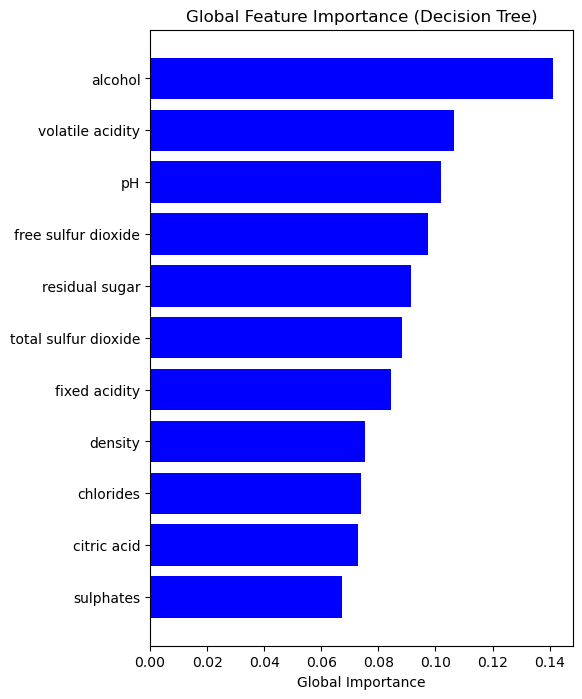

In [19]:
np.random.seed(42)
feature_names = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

instance_index = 3
instance = X_test.iloc[instance_index].values.reshape(1, -1)

exp = explainer.explain_instance(instance.flatten(), model.predict_proba, labels=[3], num_features=len(X_train.columns))


lime_feature_importances = exp.as_list(label=3)  # Label 3 refers to class 6
lime_feature_names, lime_importances = zip(*lime_feature_importances)

# lobal feature importance from the DecisionTreeClassifier
tree_feature_importances = model.feature_importances_

# Plot 
plt.figure(figsize=(12, 8))

# Global Feature Importance
plt.subplot(1, 2, 1)
plt.title("Global Feature Importance (Decision Tree)")
plt.barh(np.array(feature_names)[sorted_indices], tree_feature_importances[sorted_indices], color='blue')
plt.xlabel("Global Importance")
plt.gca().invert_yaxis()

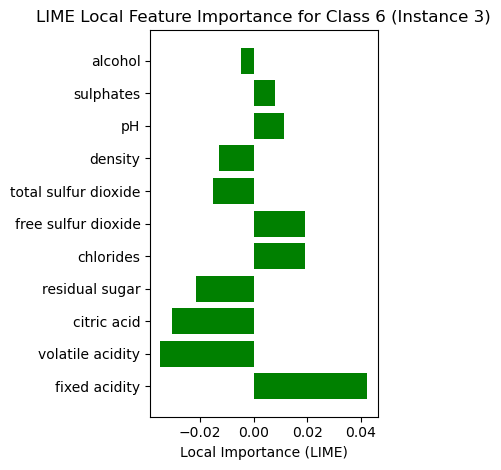

In [20]:
# Local Feature Importance (LIME)
plt.subplot(1, 2, 2)
plt.title(f"LIME Local Feature Importance for Class 6 (Instance {instance_index})")
plt.barh(feature_names, lime_importances, color='green')
plt.xlabel("Local Importance (LIME)")

plt.tight_layout()
plt.show()

c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  

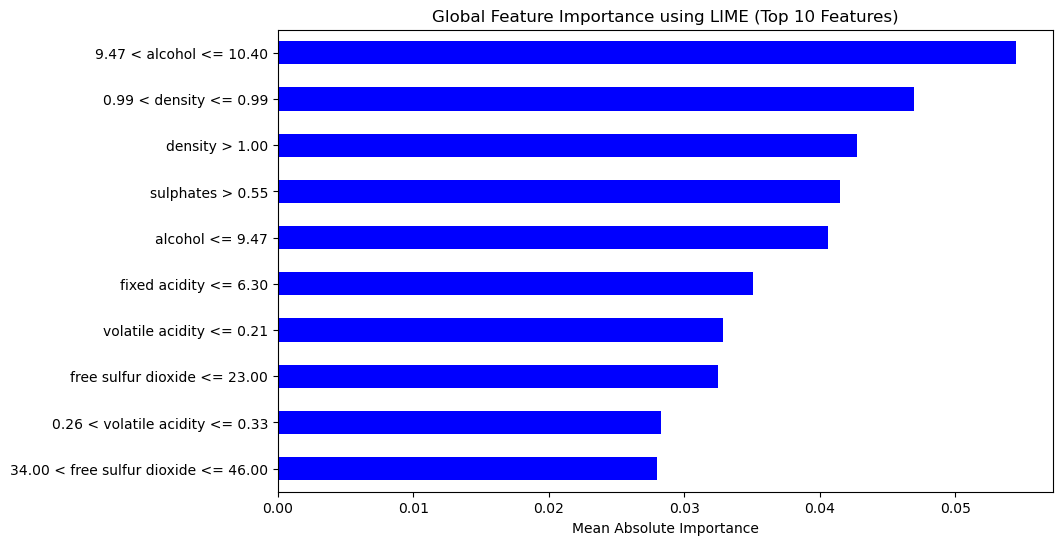

In [21]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names,mode='classification')                            
num_instances = 1400  
feature_importances = []

for i in range(num_instances):
    instance = X_test.iloc[i].values.reshape(1, -1)
    exp = explainer.explain_instance(instance.flatten(), model.predict_proba, labels=[3],  num_features=len(X_train.columns))
    local_importance = dict(exp.as_list(label=3))  
    feature_importances.append(local_importance)

# list of local importances to a DataFrame
df_importance = pd.DataFrame(feature_importances)

# mean absolute importance for each feature (global importance)
global_feature_importance = df_importance.abs().mean(axis=0)

# top 10 features by importance
top_features = global_feature_importance.sort_values(ascending=False).head(10)

# Step 6: Plot clean global feature importance using LIME
plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='blue')
plt.xlabel("Mean Absolute Importance")
plt.title("Global Feature Importance using LIME (Top 10 Features)")
plt.show()


In [9]:
# Model Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.58


In [22]:
# function to calculate stability score
np.random.seed(42)
def calculate_stability_score(instance, model, explainer, epsilon=0.1, num_samples=200):

    exp = explainer.explain_instance(instance, model.predict_proba, num_features=len(feature_names))
    phi_original = np.array([imp for _, imp in exp.as_list()])

    # Generate perturbed samples
    perturbations = np.random.normal(loc=0, scale=epsilon, size=(num_samples, instance.shape[0]))
    perturbed_samples = np.clip(instance + perturbations, X_train.values.min(axis=0), X_train.values.max(axis=0))

    max_stability = 0
    for perturbed_instance in perturbed_samples:
        #perturbed instance
        exp_perturbed = explainer.explain_instance(perturbed_instance, model.predict_proba, num_features=len(feature_names))
        phi_perturbed = np.array([imp for _, imp in exp_perturbed.as_list()])

        # L2 norms
        phi_diff = np.linalg.norm(phi_original - phi_perturbed, ord=2)
        input_diff = np.linalg.norm(instance - perturbed_instance, ord=2)

        # Stability score
        stability = phi_diff / (input_diff + 1e-8) 
        max_stability = max(max_stability, stability)

    return max_stability

num_instances = 50  # Number of instances to sample for stability calculation
stability_scores_dt_lime = []

for i in range(num_instances):
    instance = X_test.iloc[i].values
    score = calculate_stability_score(instance, model, explainer) 
    stability_scores_dt_lime.append(score)

print("Stability scores for DT + LIME:", stability_scores_dt_lime)


c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  

Stability scores for DT + LIME: [0.46151293383611347, 0.4051994193581883, 0.4460423372413503, 1.044677753721351, 0.6579328672590488, 0.8815483907990547, 0.46567646068064167, 0.6280257831321767, 0.8015128591452196, 0.26181064475462074, 0.5325414208667864, 0.49463923115489467, 0.7625908853971374, 0.6189664026586768, 0.4229306335796316, 0.4794725938217877, 0.32702245201089153, 0.6246025463838119, 0.4249950942424667, 0.6526888000729439, 0.44767996999062215, 0.8034445142085769, 0.49235841779408707, 0.4694647257654968, 0.4339854965942503, 0.5180494213958029, 0.42683267951220416, 0.4066340231138149, 0.5742986692852469, 0.41920080823069983, 0.39740808679913053, 0.4900328991734853, 0.5733156317722239, 0.4077904269754672, 0.5139677217172336, 0.6773429856195479, 0.4297378150194486, 0.3817848436632876, 0.49312697009320267, 0.3962214220934525, 0.314679475023361, 0.4499517114215291, 0.49053553613808465, 0.3741100182006091, 0.3875731856747262, 0.585012629870294, 0.6516865694973227, 0.4568602045284506

c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
print(f"Number of SHAP arrays (outputs): {len(shap_values)}")
print(f"Shape of each SHAP array: {shap_values[0].shape}")

NameError: name 'shap_values' is not defined

In [47]:
# function to get feature importance vector using LIME
def get_lime_feature_importance(instance, model, explainer):
    exp = explainer.explain_instance(instance.flatten(), model.predict_proba, num_features=len(feature_names))
    phi = np.array([imp for _, imp in exp.as_list()])
    return phi

# Example usage for 10 instances
lime_feature_importances = []
for i in range(2):
    instance = X_test.iloc[i].values.reshape(1, -1)
    phi = get_lime_feature_importance(instance, model, explainer)
    lime_feature_importances.append(phi)

lime_feature_importances = np.array(lime_feature_importances)

print("consistancy scores for DT + LIME:", lime_feature_importances)


consistancy scores for DT + LIME: [[ 0.0336107   0.02512089  0.01900038  0.01465093 -0.00808049  0.00649287
  -0.00581056  0.00261802 -0.00189144 -0.00094999 -0.00080864]
 [ 0.01230689 -0.01145544 -0.00961669 -0.00959387 -0.00731815 -0.00583838
  -0.00553129 -0.00468981 -0.00438776  0.00379203  0.00323958]]


c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anwar\anaconda3\envs\wine_env2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
